<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 

    
### <font color='navy'> Simulación matemática. 

**Nombres:** 

 Isabela Torres-Septien Uribe 
    
                                                         Óscar Guillermo Chiw Lozano.

**Fecha:** 01 de octubre del 2023.

**Expediente:** 
* 730667
* 736814
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github:** https://github.com/IsabelaTorres0/T6_ITorresSeptien_OChiw

# Tarea 6: Clase 9

## TAREA 6
1. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 1, 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

Código de solución Isabela Torres

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#Definir la función montecarlo 2
def montecarlo2(region, a1, b1, a2, b2, N):
    AR = (b1-a1)*(b2-a2)
    x = np.random.uniform(a1, b1, N)
    y = np.random.uniform(a2, b2, N)
    bi = region(x, y)
    AD_approx = AR*np.mean(bi)
    return AD_approx

In [13]:
def region(x, y):
    return x**2 + 2*y**2 <= -2*x + 8*y - 7

In [14]:
xnum = np.linspace(-1, 1, 500)
ynum = np.linspace(0, 1, 500)

x, y = np.meshgrid(xnum, ynum)

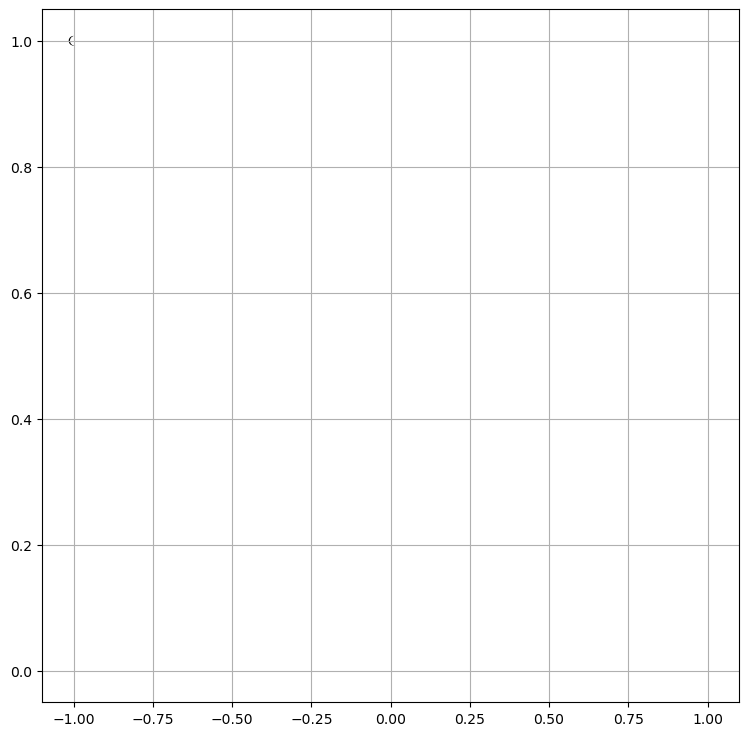

In [18]:
##~
plt.figure(figsize=(9, 9))

# Grafica los puntos del rectangulo R que estan dentro de la region D
plt.scatter(x, y, c=~region(x,y), cmap='bone') 

plt.grid()
plt.show()

In [20]:
# Resolver
a1, b1, a2, b2 = -2, 2, 1, 5

# Cantidad de términos a utilizar para la aproximación
N = np.logspace(0,5,6).astype(int)

# Crear la tabla (DataFrame de pandas)
tabla1 = pd.DataFrame(index = N, columns=['Aproximación'])

for n in N:
    area_aprox = montecarlo2(region, a1, b1, a2, b2, n)
    tabla1.loc[n, 'Aproximación'] = area_aprox


tabla1

,Aproximación
1,0.0
10,3.2
100,3.52
1000,4.368
10000,4.1072
100000,4.0376


Código de solución Guillermo Chiw

In [12]:
# Importación de librerías
import numpy as np
import pandas as pd

# Definir la función de Montecarlo
def montecarlo2(region, a1, b1, a2, b2, N):
    AR = (b1-a1)*(b2-a2)
    x = np.random.uniform(a1, b1, N)
    y = np.random.uniform(a2, b2, N)
    bi = region(x, y)
    AD_approx = AR*np.mean(bi)
    return AD_approx

# Definir la región
def region(x, y):
    return x**2 + 2*y**2 <= -2*x + 8*y - 7

# Definir límites
a1, b1, a2, b2 = -2, 2, 1, 5

# Cantidad de términos a utilizar para la aproximación
N = np.logspace(0, 5, 6).astype(int)

# Crear la tabla (DataFrame de pandas)
tabla = pd.DataFrame(index=N, columns=['Aproximación', 'Error Relativo'])

# Inicializar el primer valor de aproximación
area_anterior = None

for n in N:
    area_aprox = montecarlo2(region, a1, b1, a2, b2, n)
    
    if area_anterior is not None:
        error_relativo = (area_aprox - area_anterior) / area_anterior
    else:
        error_relativo = None
    
    tabla.loc[n, 'Aproximación'] = area_aprox
    tabla.loc[n, 'Error Relativo'] = error_relativo
    
    area_anterior = area_aprox

# Mostrar la tabla
tabla

C:\Users\guill\AppData\Local\Temp\ipykernel_21988\1148565697.py:34: RuntimeWarning: divide by zero encountered in scalar divide
  error_relativo = (area_aprox - area_anterior) / area_anterior


,Aproximación,Error Relativo
1,0.0,None
10,4.8,inf
100,3.52,-0.266667
1000,4.32,0.227273
10000,4.0896,-0.053333
100000,4.04608,-0.010642


### Conclusión
